In [7]:
# Princilap Component Analysis, PCA
# ---------------------------------

# load wine data
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# split into training and testing dataset
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize dataset for PCA
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)
print(pd.DataFrame(X_train_std))

           0         1         2         3         4         5         6   \
0    0.712259  2.220487 -0.130259  0.059629 -0.504327 -0.528316 -1.240000   
1    0.882292 -0.704572  1.175336 -0.090655  2.341479  1.016759  0.662995   
2    0.845856 -0.730230  1.175336  0.811048  0.135979  1.098079  1.163267   
3    0.578661 -0.473646  0.988823 -0.240939  0.776285  0.040922  0.457000   
4   -0.526554  0.090839 -0.689799 -0.391223 -0.362037 -1.146346 -1.377330   
..        ...       ...       ...       ...       ...       ...       ...   
119 -1.158106 -1.046684  0.466585  1.261899 -1.500359 -0.528316 -0.474879   
120  0.445064  1.330995  0.354677  0.961331  0.207124 -0.853595 -1.289047   
121  1.028035  2.297462 -0.577891  0.059629 -1.358069 -2.187238 -1.691226   
122 -1.303849 -1.080895 -0.316772  0.360196  0.135979  1.716108  0.074440   
123 -0.405102  1.296784  0.056255  0.961331  0.135979  0.821591  0.476619   

           7         8         9         10        11        12  
0    0.84

In [8]:
# get Covariance Matrix using np.cov() method
import numpy as np
cov_matrix = np.cov(X_train_std.T)

# get eigen vectors and eigen values from covariance matirx
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print('Eigen Values: \n%s' %eigen_values)   # eigen values and vectors have been sorted

Eigen Values: 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


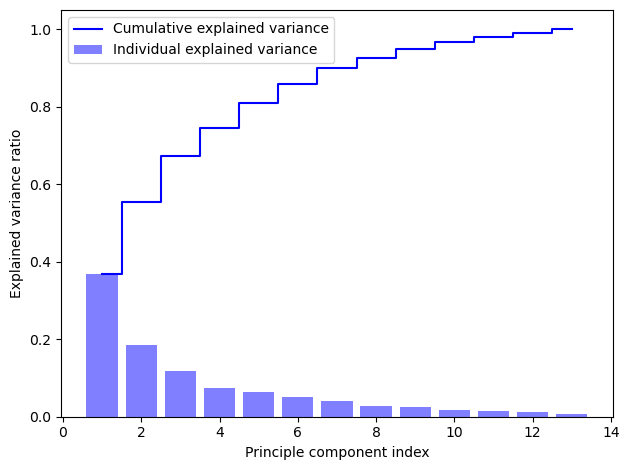

In [9]:
# get explained variance
total = sum(eigen_values)
explained_variance = [(i / total) for i in sorted(eigen_values, reverse=True)]
cumulative_explained_variance = np.cumsum(explained_variance)

# visualize explained varaince to see components distribution
import matplotlib.pyplot as plt
plt.bar(range(1, 14), explained_variance, alpha=0.5, align='center', 
        label='Individual explained variance', color='blue')
plt.step(range(1, 14), cumulative_explained_variance, where='mid', 
         label='Cumulative explained variance', color='blue')
plt.xlabel('Principle component index')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [10]:
# construct transformation matrix
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]  # pair eigenValue with eigenVector
eigen_pairs.sort(key=lambda k : k[0], reverse=True)     # sort the (eigenValue, eigenVector) tuples from high to low
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Eigen Pairs\n', pd.DataFrame(eigen_pairs))   # from the printed Dataframe we can see how eigenValues have paired with eigenVectors
print('Matrix w: \n', w)

Eigen Pairs
            0                                                  1
0   4.842745  [-0.1372421753947419, 0.24724326472687547, -0....
1   2.416025  [0.5030347775018215, 0.1648711899040404, 0.244...
2   1.548458  [-0.13774873390497339, 0.0961503863219371, 0.6...
3   0.961204  [-0.003296100029736312, 0.5626466915660855, -0...
4   0.841662  [0.2906252257449247, -0.08953786973235323, 0.1...
5   0.662063  [-0.29909684669278896, -0.6270363959085078, -0...
6   0.518285  [-0.07905292926424415, 0.2740020139105388, -0....
7   0.346504  [0.36817641378890537, 0.012577575180257027, -0...
8   0.313137  [0.3983770165361192, -0.11045823023317222, -0....
9   0.213572  [0.37463887685189157, -0.13740559709785954, 0....
10  0.180861  [0.262834262633827, -0.26676921080929306, -0.1...
11  0.153628  [-0.1278345148573657, 0.08064015777141849, 0.0...
12  0.107546  [-0.09448697770622806, 0.026365240580018455, 0...
Matrix w: 
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476

In [20]:
# construct a whole PCA function for reuse
def PCA(X_std, n_components):
    import numpy as np
    cov_matrix = np.cov(X_std.T)
    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]  # pair eigenValue with eigenVector
    eigen_pairs.sort(key=lambda k : k[0], reverse=True)     # sort the (eigenValue, eigenVector) tuples from high to low
    w = np.hstack(([eigen_pairs[i][1][:, np.newaxis] for i in range(n_components)]))
    X_PCA = X_std.dot(w)
    return X_PCA

            0         1
0    2.382990  0.454585
1   -1.965782  1.653769
2   -2.539076  1.029091
3   -1.430108  0.602401
4    3.141472  0.662150
..        ...       ...
119  0.435211 -2.403558
120  2.590451  1.638529
121  4.353084  0.665360
122 -1.843154 -1.506884
123 -0.408610 -1.297206

[124 rows x 2 columns]
            0         1
0    2.382990  0.454585
1   -1.965782  1.653769
2   -2.539076  1.029091
3   -1.430108  0.602401
4    3.141472  0.662150
..        ...       ...
119  0.435211 -2.403558
120  2.590451  1.638529
121  4.353084  0.665360
122 -1.843154 -1.506884
123 -0.408610 -1.297206

[124 rows x 2 columns]


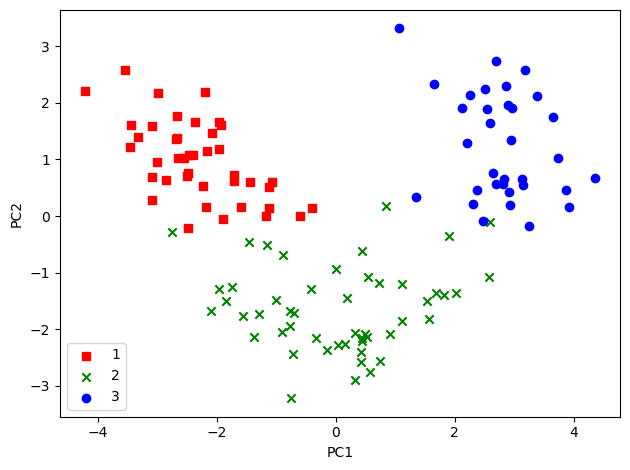

In [21]:
# transform the training data with new matrix
X_train_pca = X_train_std.dot(w)
X_train_pca_1 = PCA(X_train_std, 2)
print(pd.DataFrame(X_train_pca))
print(pd.DataFrame(X_train_pca_1))

# show the final PCA training dataset
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

c:\Users\12923\Desktop\ML_DataScience\Chapter_4\plot_decision_regions_script.py:38: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[y==col, 0],


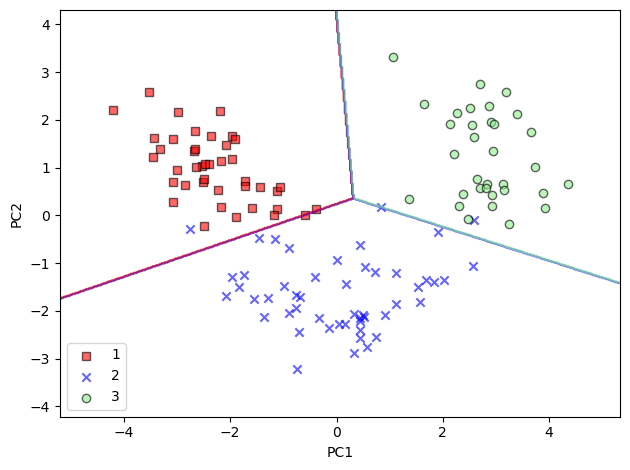

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [ ]:
# PCA with Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initialize pca and logisticRegression class
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')

# apply pca for dimensionality reduction
X_train_PCA = pca.fit_transform(X_train_std)
X_test_PCA = pca.transform(X_test_std)

# fitting model
lr.fit(X_train_pca, y_train)

# plot result
from plot_decision_regions_script import plot_decision_regions
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# we can also access explained_variance_ratio_
new_pca = PCA(n_components=None)
X_train_Pca = new_pca.fit_transform(X_train_std)
new_pca.explained_variance_ratio_